<center><h2>
<a href="https://masumbhai.me">Kindly visit my portfolio to see more of my works</a>
</h2></center>

In [8]:
import warnings

import numpy as np
import pandas as pd
from dask import dataframe as dd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\Thesis-on-DDOS-main\\images\\"

In [9]:
def readCSV_Function(file_path):
    dask_df = dd.read_csv(file_path, blocksize=1e6)
    dask_df = dask_df.repartition(npartitions=8)
    return dask_df.compute(scheduler='threads')

In [10]:
filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\Concatenated_Data_Before_Feature_Engineering\\"
fileName = "Cleaned_Data.csv"

initial_df = readCSV_Function(filePath+fileName)
initial_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
initial_df.drop(initial_df[initial_df.Label == "WebDDoS"].index, inplace=True,errors='ignore')
initial_df = shuffle(initial_df)
print(initial_df.shape)
initial_df['Label'].value_counts()

(381766, 78)


DrDoS_UDP        37348
DrDoS_SSDP       37275
TFTP             37270
Syn              37270
DrDoS_MSSQL      37085
DrDoS_NTP        36828
DrDoS_SNMP       36764
DrDoS_DNS        36347
UDP-lag          35703
DrDoS_LDAP       26703
DrDoS_NetBIOS    16287
BENIGN            6886
Name: Label, dtype: int64

In [11]:
features_filepath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Feature_Engineering\\Selected_Features_along_with_PCA.csv"
features_df = readCSV_Function(features_filepath)
features_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
features_df

,Features,Names
0,feature-0,ACK Flag Count
1,feature-1,Active Max
2,feature-2,Active Min
3,feature-3,Active Std
4,feature-4,Avg Packet Size
5,feature-5,Bwd Header Length
6,feature-6,Bwd IAT Max
7,feature-7,Bwd IAT Mean
8,feature-8,Bwd IAT Min
9,feature-9,Bwd IAT Total


In [12]:
feature_list = list(features_df["Names"])
feature_list.remove("Label")
feature_list.append("Label")

df = initial_df[feature_list]

weights = df['Label'].value_counts()/len(df)
y = df['Label']
X = df.drop(columns='Label')

<center><h3 style="background:#00FF00;color:black">
Saving the imbalanced initial dataset
</h3></center>

In [13]:
filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\For_Model_Creation\\"
fileName = "imbalanced_43_features_DDOS_dataset.csv"
df.to_csv(filePath+fileName,index=False,header=True)

<center><h3 style="background:#FFEB3B;color:black">
Applying Repeated Edited Nearest Neighbors undersampling
</h3></center>

In [ ]:
from collections import Counter
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

renn = RepeatedEditedNearestNeighbours(sampling_strategy='not minority', n_neighbors=3, max_iter=50, n_jobs=-1)
X_resampled_renn, y_resampled_renn = renn.fit_resample(X, y)

In [16]:
counter = Counter(y_resampled_renn)
counter.most_common() # sorting ascending order for better plotting in graph
for i,j in counter.items():
    per = j/len(y_resampled_renn) * 100
    print(f"Label:{i}  n:{j}  {per:.3}%")

Label:BENIGN  n:6886  3.33%
Label:DrDoS_DNS  n:12795  6.19%
Label:DrDoS_LDAP  n:8489  4.1%
Label:DrDoS_MSSQL  n:21545  10.4%
Label:DrDoS_NTP  n:27631  13.4%
Label:DrDoS_NetBIOS  n:5098  2.46%
Label:DrDoS_SNMP  n:21837  10.6%
Label:DrDoS_SSDP  n:4333  2.09%
Label:DrDoS_UDP  n:4598  2.22%
Label:Syn  n:33225  16.1%
Label:TFTP  n:36615  17.7%
Label:UDP-lag  n:23808  11.5%


In [17]:
data_res = np.concatenate((X_resampled_renn, np.vstack(y_resampled_renn)), axis = 1)
data_res = pd.DataFrame(data_res,columns=df.columns)
data_res = shuffle(data_res)
fileName = "Repeated_Edited_Nearest_Neighbors_Under-sampled_Dataset.csv"
data_res.to_csv(filePath+fileName,index=False,header=True)

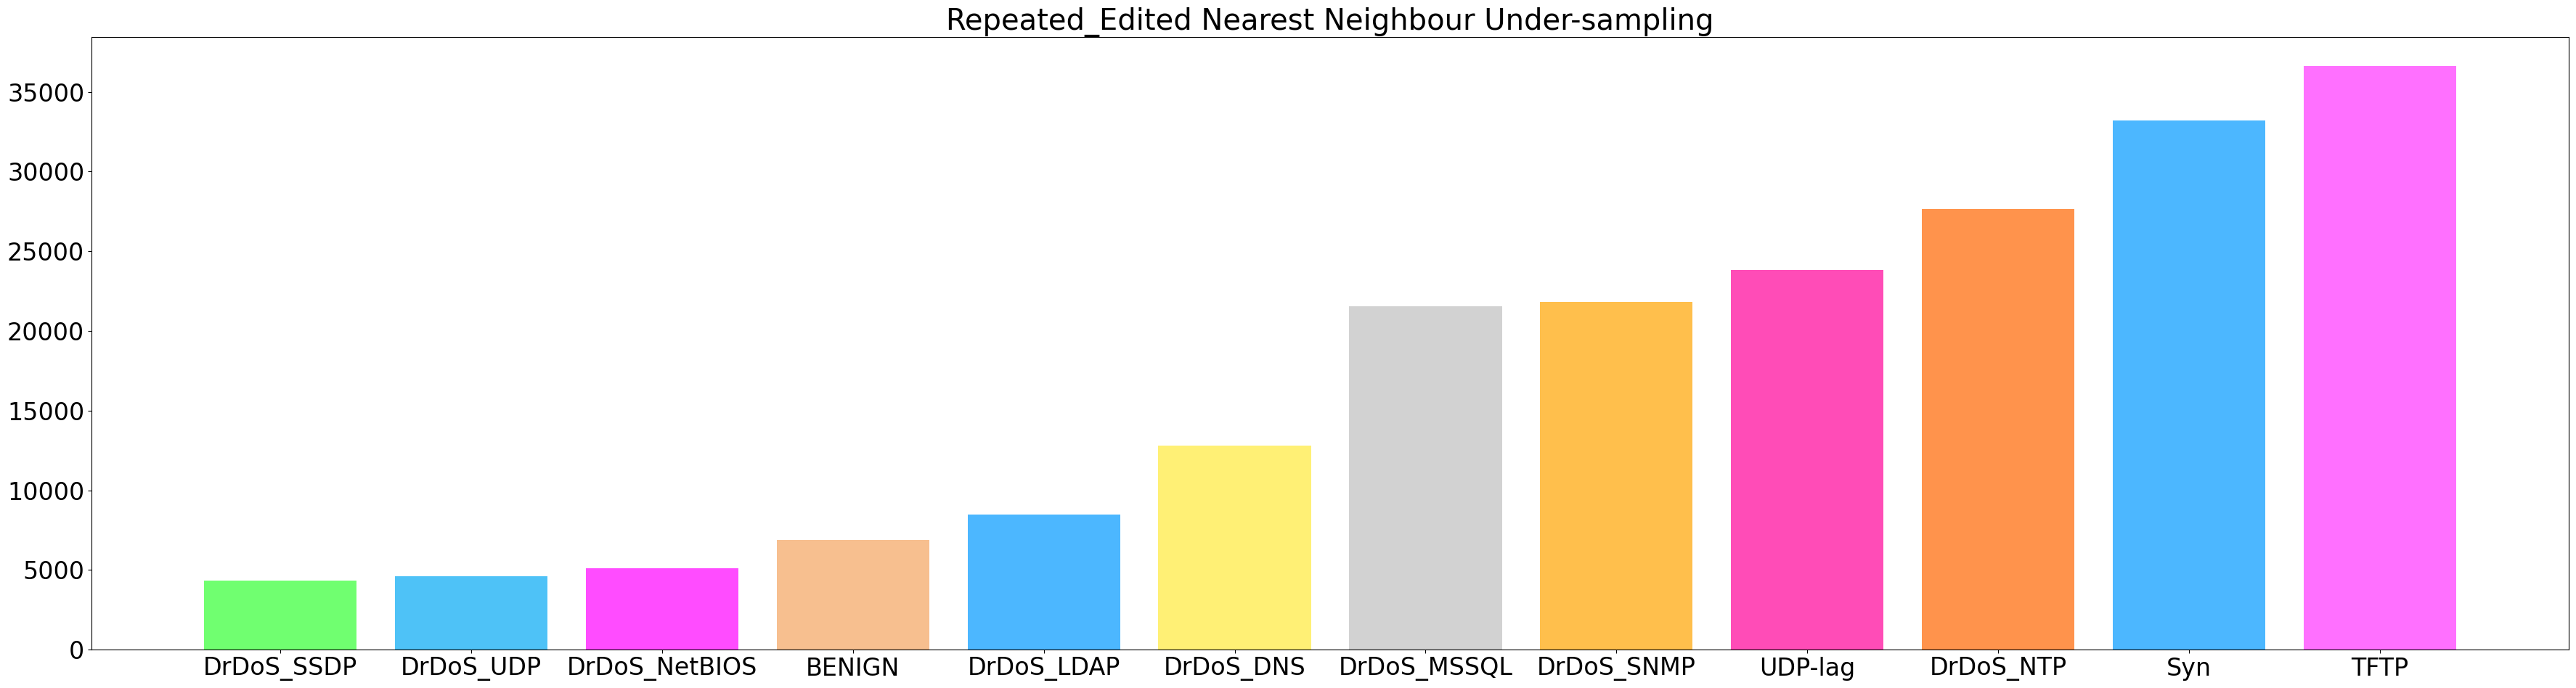

In [21]:
imgName = "Undersampled_by_Repeated_Edited_Nearest_Neighbour.png"
colors = ["#33FF33","#03A9F4","magenta","#F4A460","#0099FF","#FFEB3B","#C0C0C0","orange","#FF0099","#FF6600","#0099FF","#FF33FF"]

plt.figure(figsize=(36,10))
plt.bar(x=sorted(counter, key=counter.get),height=sorted(counter.values()),color=colors,alpha=0.7,align="center",linewidth=0.5)
plt.rcParams['font.size'] = 24
plt.title("Repeated_Edited Nearest Neighbour Under-sampling")
plt.tight_layout()
plt.savefig(imgPath+imgName)

<center><h3 style="background:#FFEB3B;color:black">
Applying Edited Nearest Neighbors undersampling
</h3></center>

In [22]:
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours(sampling_strategy='not minority', n_neighbors=3, n_jobs=-1)
X_resampled_enn, y_resampled_enn = enn.fit_resample(X, y)

data_res = np.concatenate((X_resampled_enn, np.vstack(y_resampled_enn)), axis = 1)
data_res = pd.DataFrame(data_res,columns=df.columns)
data_res = shuffle(data_res)
fileName = "Edited_Nearest_Neighbors_Under-sampled_Dataset.csv"
data_res.to_csv(filePath+fileName,index=False,header=True)

counter = Counter(y_resampled_enn)
counter.most_common() # sorting ascending order for better plotting in graph
for i,j in counter.items():
    per = j/len(y_resampled_enn) * 100
    print(f"Label:{i}  n:{j}  {per:.3}%")

Label:BENIGN  n:6886  3.33%
Label:DrDoS_DNS  n:12795  6.19%
Label:DrDoS_LDAP  n:8489  4.1%
Label:DrDoS_MSSQL  n:21545  10.4%
Label:DrDoS_NTP  n:27631  13.4%
Label:DrDoS_NetBIOS  n:5098  2.46%
Label:DrDoS_SNMP  n:21837  10.6%
Label:DrDoS_SSDP  n:4333  2.09%
Label:DrDoS_UDP  n:4598  2.22%
Label:Syn  n:33225  16.1%
Label:TFTP  n:36615  17.7%
Label:UDP-lag  n:23808  11.5%


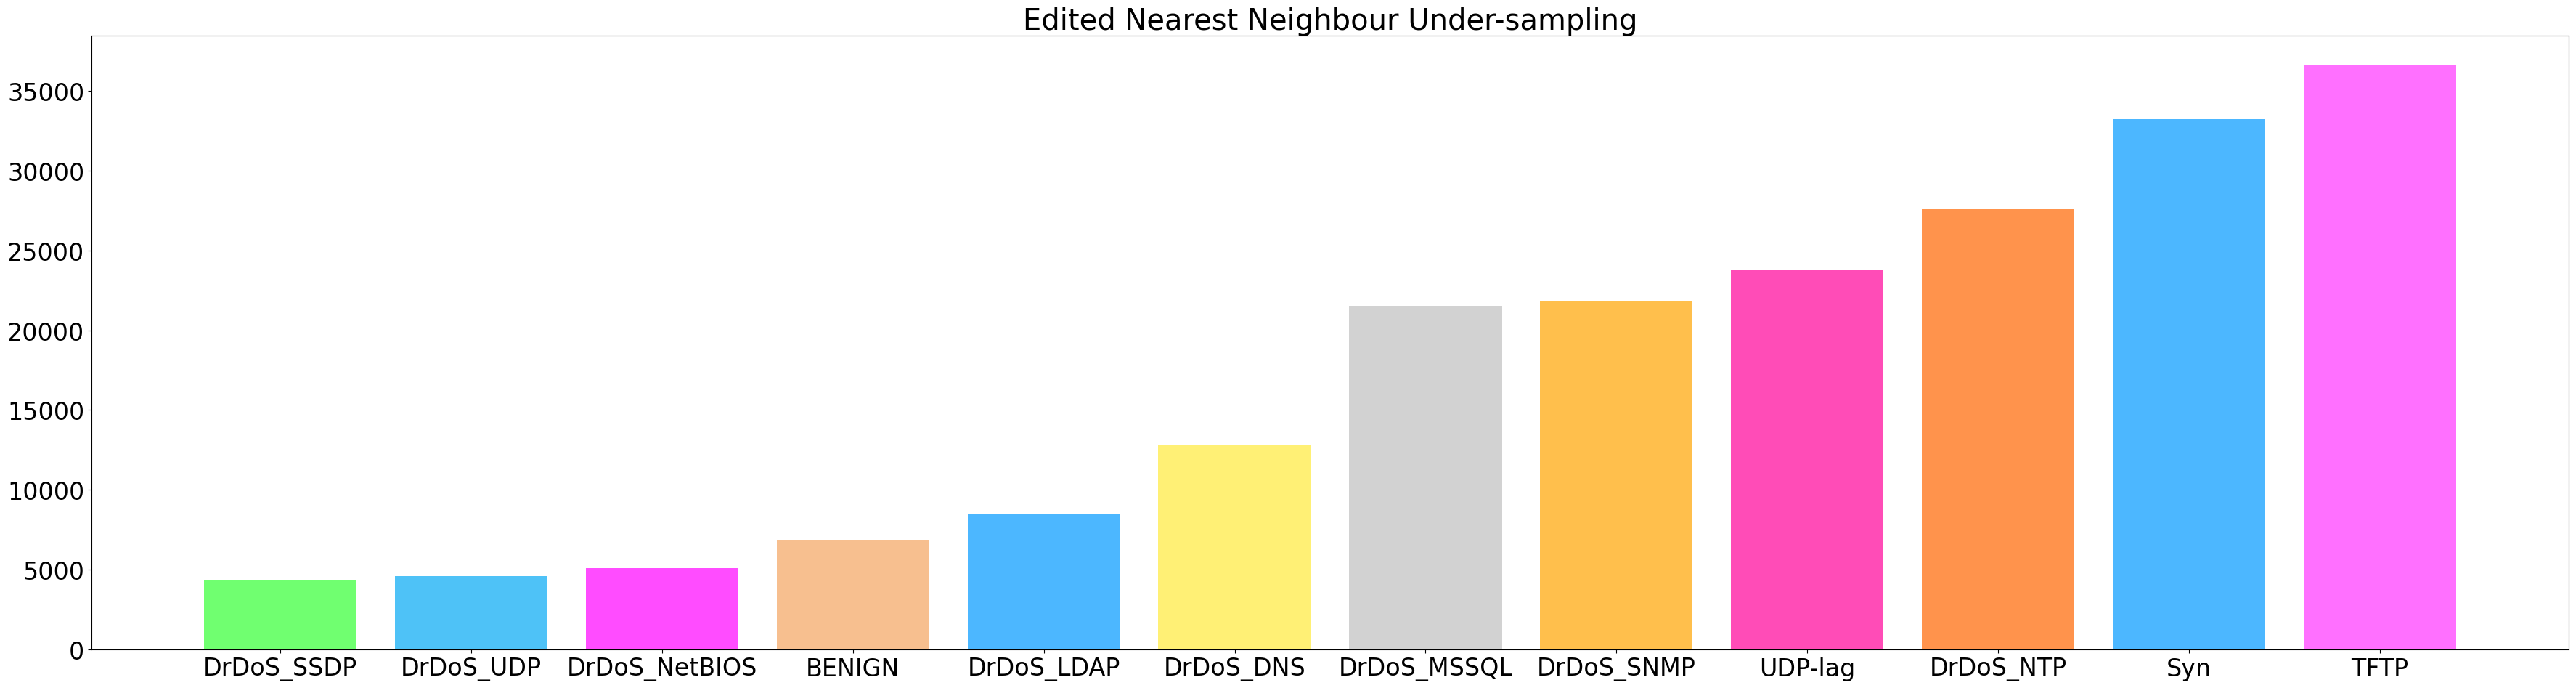

In [23]:
imgName = "Undersampled_by_Edited_Nearest_Neighbour.png"
colors = ["#33FF33","#03A9F4","magenta","#F4A460","#0099FF","#FFEB3B","#C0C0C0","orange","#FF0099","#FF6600","#0099FF","#FF33FF"]

plt.figure(figsize=(36,10))
plt.bar(x=sorted(counter, key=counter.get),height=sorted(counter.values()),color=colors,alpha=0.7,align="center",linewidth=0.5)
plt.rcParams['font.size'] = 24
plt.title("Edited Nearest Neighbour Under-sampling")
plt.tight_layout()
plt.savefig(imgPath+imgName)

<center><h3 style="background:#FFEB3B;color:black">
Applying Near Miss version-1 undersampling
</h3></center>

In [24]:
from imblearn.under_sampling import NearMiss
from collections import Counter

nm1 = NearMiss(version=1)
X_resampled_nm1, y_resampled_nm1 = nm1.fit_resample(X, y)

data_res = np.concatenate((X_resampled_nm1, np.vstack(y_resampled_nm1)), axis = 1)
data_res = pd.DataFrame(data_res,columns=df.columns)
data_res = shuffle(data_res)
fileName = "Near_Miss_Version-1_Under-sampled_Dataset.csv"
data_res.to_csv(filePath+fileName,index=False,header=True)

counter = Counter(y_resampled_nm1)
counter.most_common() # sorting ascending order for better plotting in graph
for i,j in counter.items():
    per = j/len(y_resampled_nm1) * 100
    print(f"Label:{i}  n:{j}  {per:.3}%")

Label:BENIGN  n:6886  8.33%
Label:DrDoS_DNS  n:6886  8.33%
Label:DrDoS_LDAP  n:6886  8.33%
Label:DrDoS_MSSQL  n:6886  8.33%
Label:DrDoS_NTP  n:6886  8.33%
Label:DrDoS_NetBIOS  n:6886  8.33%
Label:DrDoS_SNMP  n:6886  8.33%
Label:DrDoS_SSDP  n:6886  8.33%
Label:DrDoS_UDP  n:6886  8.33%
Label:Syn  n:6886  8.33%
Label:TFTP  n:6886  8.33%
Label:UDP-lag  n:6886  8.33%


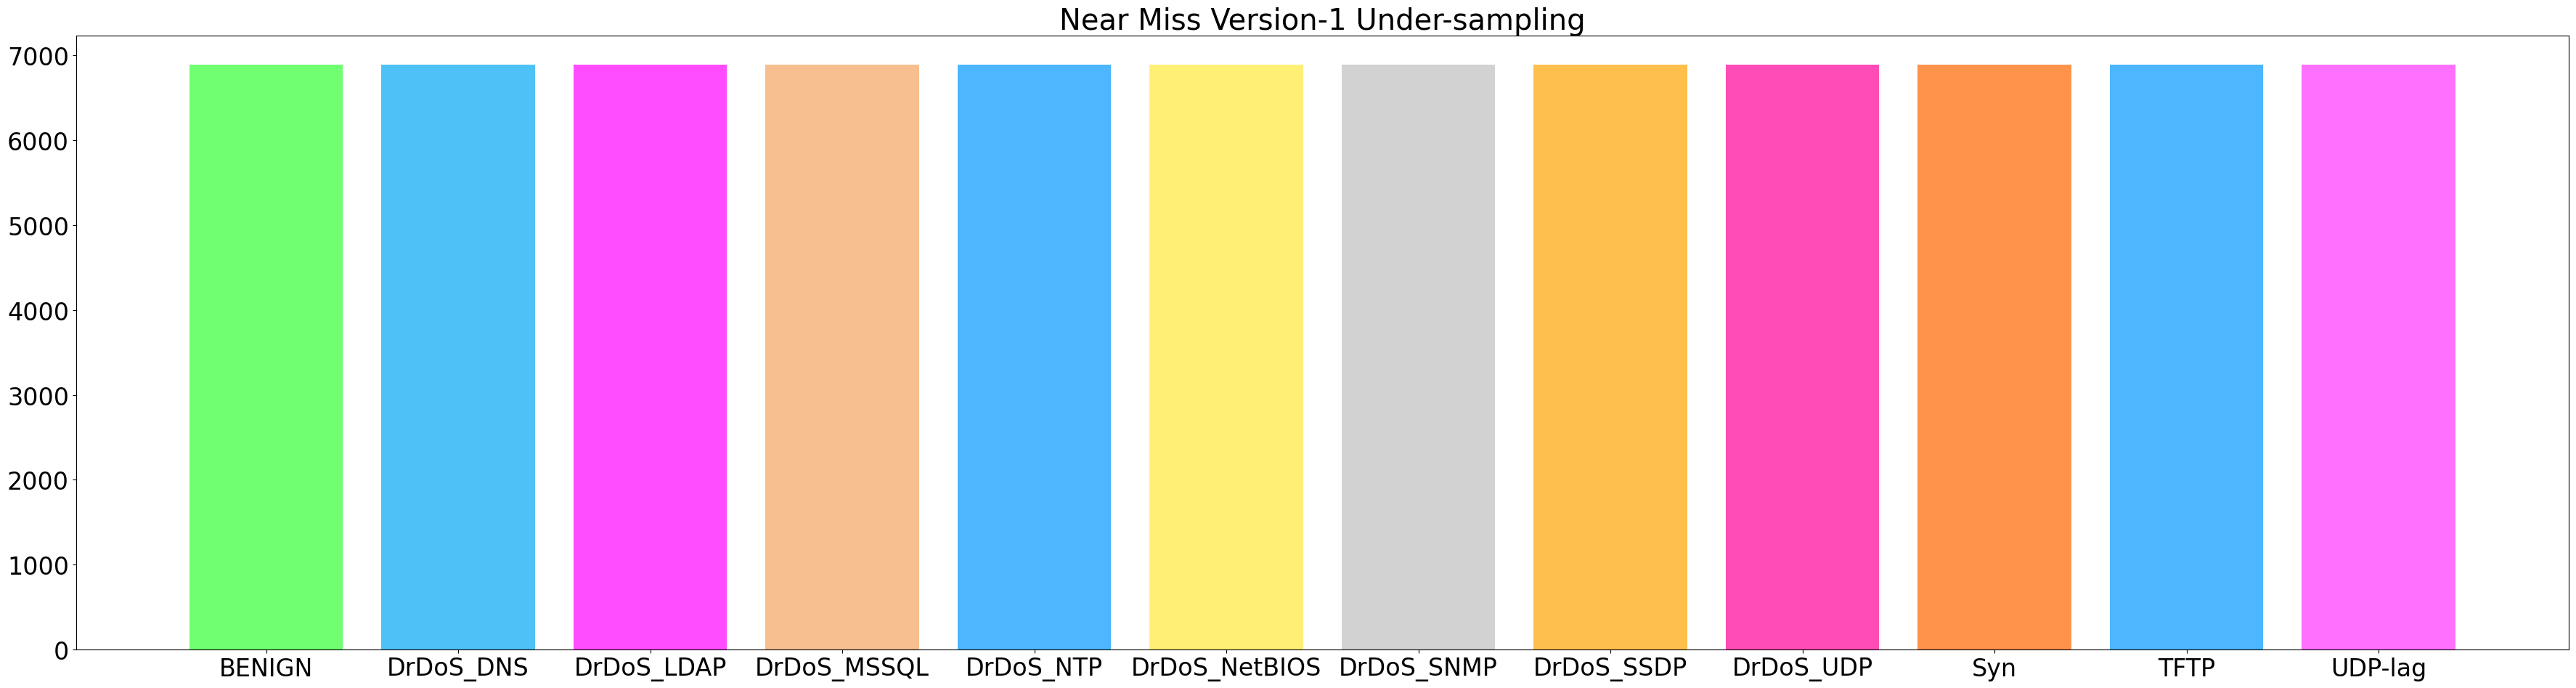

In [25]:
imgName = "Undersampled_by_Near_Miss_Version-1.png"
colors = ["#33FF33","#03A9F4","magenta","#F4A460","#0099FF","#FFEB3B","#C0C0C0","orange","#FF0099","#FF6600","#0099FF","#FF33FF"]

plt.figure(figsize=(36,10))
plt.bar(x=sorted(counter, key=counter.get),height=sorted(counter.values()),color=colors,alpha=0.7,align="center",linewidth=0.5)
plt.rcParams['font.size'] = 24
plt.title("Near Miss Version-1 Under-sampling")
plt.tight_layout()
plt.savefig(imgPath+imgName)

<center><h3 style="background:#FFEB3B;color:black">
Applying Near Miss version-2 undersampling
</h3></center>

In [26]:
from imblearn.under_sampling import NearMiss
from collections import Counter

nm2 = NearMiss(version=2)
X_resampled_nm2, y_resampled_nm2 = nm2.fit_resample(X, y)

data_res = np.concatenate((X_resampled_nm2, np.vstack(y_resampled_nm2)), axis = 1)
data_res = pd.DataFrame(data_res,columns=df.columns)
data_res = shuffle(data_res)
fileName = "Near_Miss_Version-2_Under-sampled_Dataset.csv"
data_res.to_csv(filePath+fileName,index=False,header=True)

counter = Counter(y_resampled_nm2)
counter.most_common() # sorting ascending order for better plotting in graph
for i,j in counter.items():
    per = j/len(y_resampled_nm2) * 100
    print(f"Label:{i}  n:{j}  {per:.3}%")

Label:BENIGN  n:6886  8.33%
Label:DrDoS_DNS  n:6886  8.33%
Label:DrDoS_LDAP  n:6886  8.33%
Label:DrDoS_MSSQL  n:6886  8.33%
Label:DrDoS_NTP  n:6886  8.33%
Label:DrDoS_NetBIOS  n:6886  8.33%
Label:DrDoS_SNMP  n:6886  8.33%
Label:DrDoS_SSDP  n:6886  8.33%
Label:DrDoS_UDP  n:6886  8.33%
Label:Syn  n:6886  8.33%
Label:TFTP  n:6886  8.33%
Label:UDP-lag  n:6886  8.33%


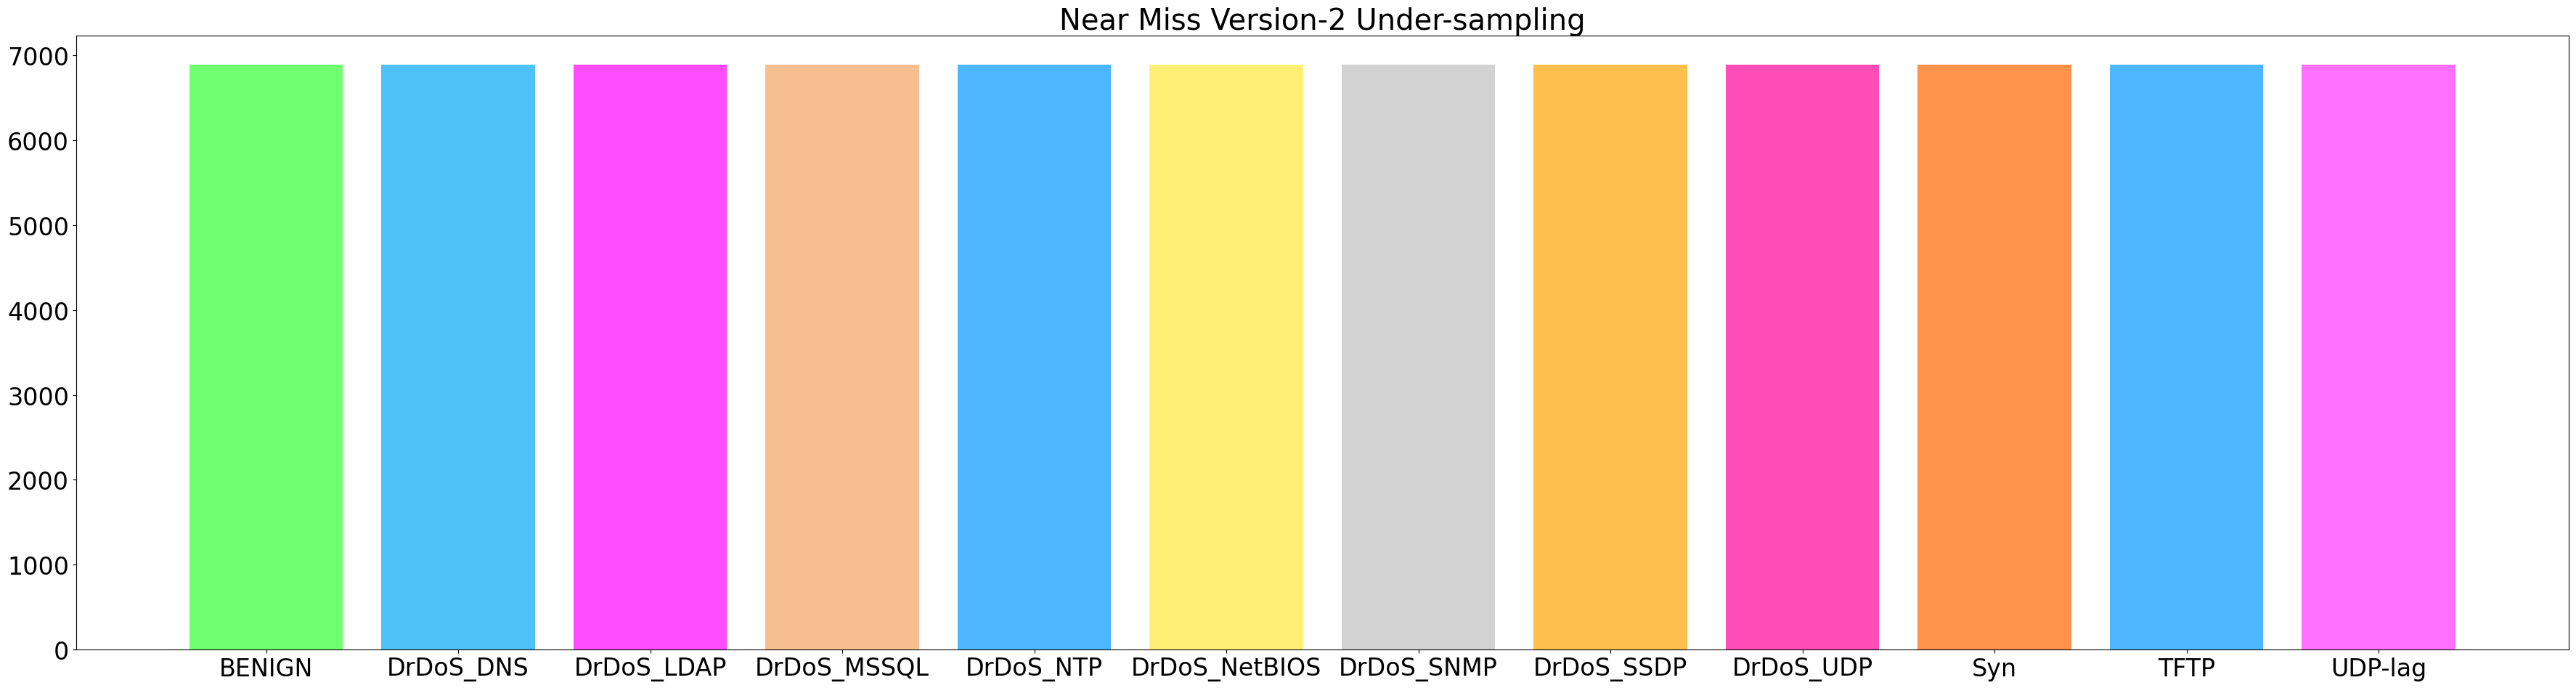

In [27]:
imgName = "Undersampled_by_Near_Miss_Version-2.png"
colors = ["#33FF33","#03A9F4","magenta","#F4A460","#0099FF","#FFEB3B","#C0C0C0","orange","#FF0099","#FF6600","#0099FF","#FF33FF"]

plt.figure(figsize=(36,10))
plt.bar(x=sorted(counter, key=counter.get),height=sorted(counter.values()),color=colors,alpha=0.7,align="center",linewidth=0.5)
plt.rcParams['font.size'] = 24
plt.title("Near Miss Version-2 Under-sampling")
plt.tight_layout()
plt.savefig(imgPath+imgName)

<center><h3 style="background:#FFEB3B;color:black">
Applying Near Miss version-3 undersampling
</h3></center>

In [28]:
from imblearn.under_sampling import NearMiss
from collections import Counter

nm3 = NearMiss(version=3,n_neighbors_ver3=3,n_jobs=-1)
X_resampled_nm3, y_resampled_nm3 = nm3.fit_resample(X, y)

data_res = np.concatenate((X_resampled_nm3, np.vstack(y_resampled_nm3)), axis = 1)
data_res = pd.DataFrame(data_res,columns=df.columns)
data_res = shuffle(data_res)
fileName = "Near_Miss_Version-3_Under-sampled_Dataset.csv"
data_res.to_csv(filePath+fileName,index=False,header=True)

counter = Counter(y_resampled_nm3)
counter.most_common() # sorting ascending order for better plotting in graph
for i,j in counter.items():
    per = j/len(y_resampled_nm3) * 100
    print(f"Label:{i}  n:{j}  {per:.3}%")

Label:BENIGN  n:6886  46.2%
Label:DrDoS_DNS  n:700  4.69%
Label:DrDoS_LDAP  n:424  2.84%
Label:DrDoS_MSSQL  n:466  3.12%
Label:DrDoS_NTP  n:682  4.57%
Label:DrDoS_NetBIOS  n:858  5.75%
Label:DrDoS_SNMP  n:687  4.61%
Label:DrDoS_SSDP  n:801  5.37%
Label:DrDoS_UDP  n:719  4.82%
Label:Syn  n:1254  8.41%
Label:TFTP  n:475  3.18%
Label:UDP-lag  n:963  6.46%


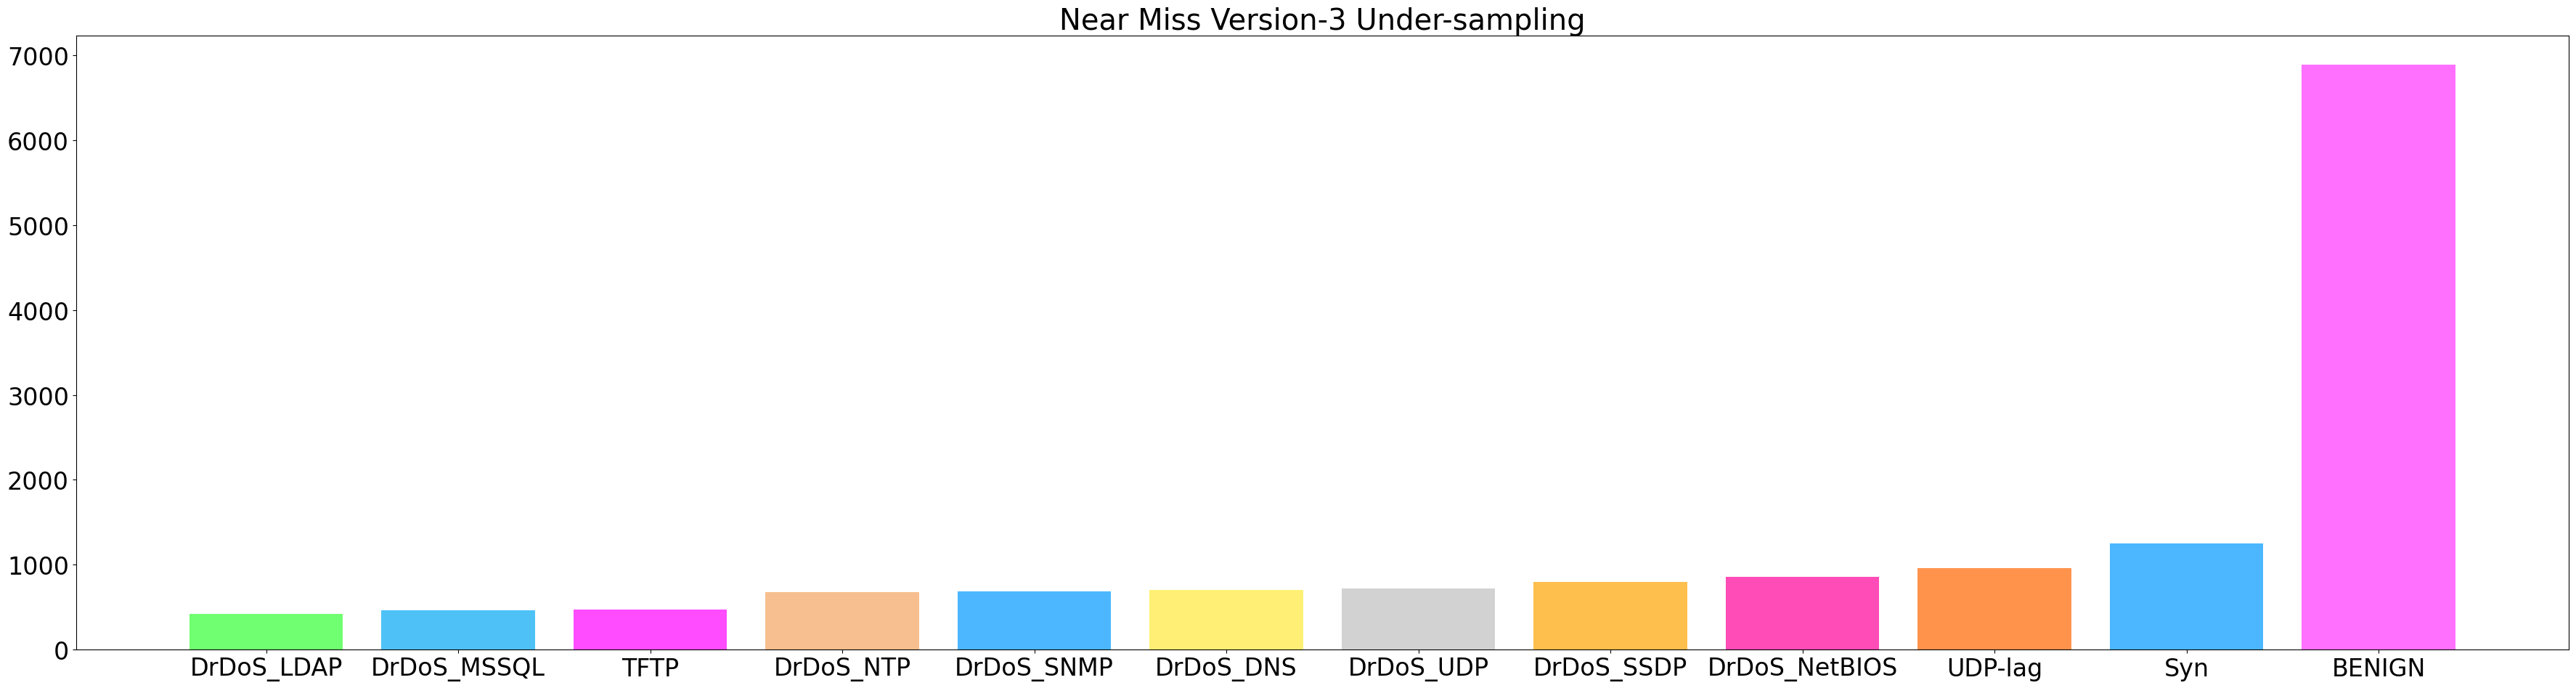

In [29]:
imgName = "Undersampled_by_Near_Miss_Version-3.png"
colors = ["#33FF33","#03A9F4","magenta","#F4A460","#0099FF","#FFEB3B","#C0C0C0","orange","#FF0099","#FF6600","#0099FF","#FF33FF"]

plt.figure(figsize=(36,10))
plt.bar(x=sorted(counter, key=counter.get),height=sorted(counter.values()),color=colors,alpha=0.7,align="center",linewidth=0.5)
plt.rcParams['font.size'] = 24
plt.title("Near Miss Version-3 Under-sampling")
plt.tight_layout()
plt.savefig(imgPath+imgName)

<center><h3 style="background:#FFEB3B;color:black">
Applying Cluster Centroids undersampling
</h3></center>

In [30]:
from collections import Counter
from imblearn.under_sampling import ClusterCentroids

cc_US = ClusterCentroids(sampling_strategy='majority')
X_resampled_cc, y_resampled_cc = cc_US.fit_resample(X, y)

data_res = np.concatenate((X_resampled_cc, np.vstack(y_resampled_cc)), axis = 1)
data_res = pd.DataFrame(data_res,columns=df.columns)
data_res = shuffle(data_res)
fileName = "Cluster_Centroid_Under-sampled_Dataset.csv"
data_res.to_csv(filePath+fileName,index=False,header=True)

counter = Counter(y_resampled_cc)
counter.most_common() # sorting ascending order for better plotting in graph
for i,j in counter.items():
    per = j/len(y_resampled_cc) * 100
    print(f"Label:{i}  n:{j}  {per:.3}%")

Label:BENIGN  n:6886  1.96%
Label:DrDoS_DNS  n:36347  10.3%
Label:DrDoS_LDAP  n:26703  7.6%
Label:DrDoS_MSSQL  n:37085  10.6%
Label:DrDoS_NTP  n:36828  10.5%
Label:DrDoS_NetBIOS  n:16287  4.64%
Label:DrDoS_SNMP  n:36764  10.5%
Label:DrDoS_SSDP  n:37275  10.6%
Label:DrDoS_UDP  n:6886  1.96%
Label:Syn  n:37270  10.6%
Label:TFTP  n:37270  10.6%
Label:UDP-lag  n:35703  10.2%


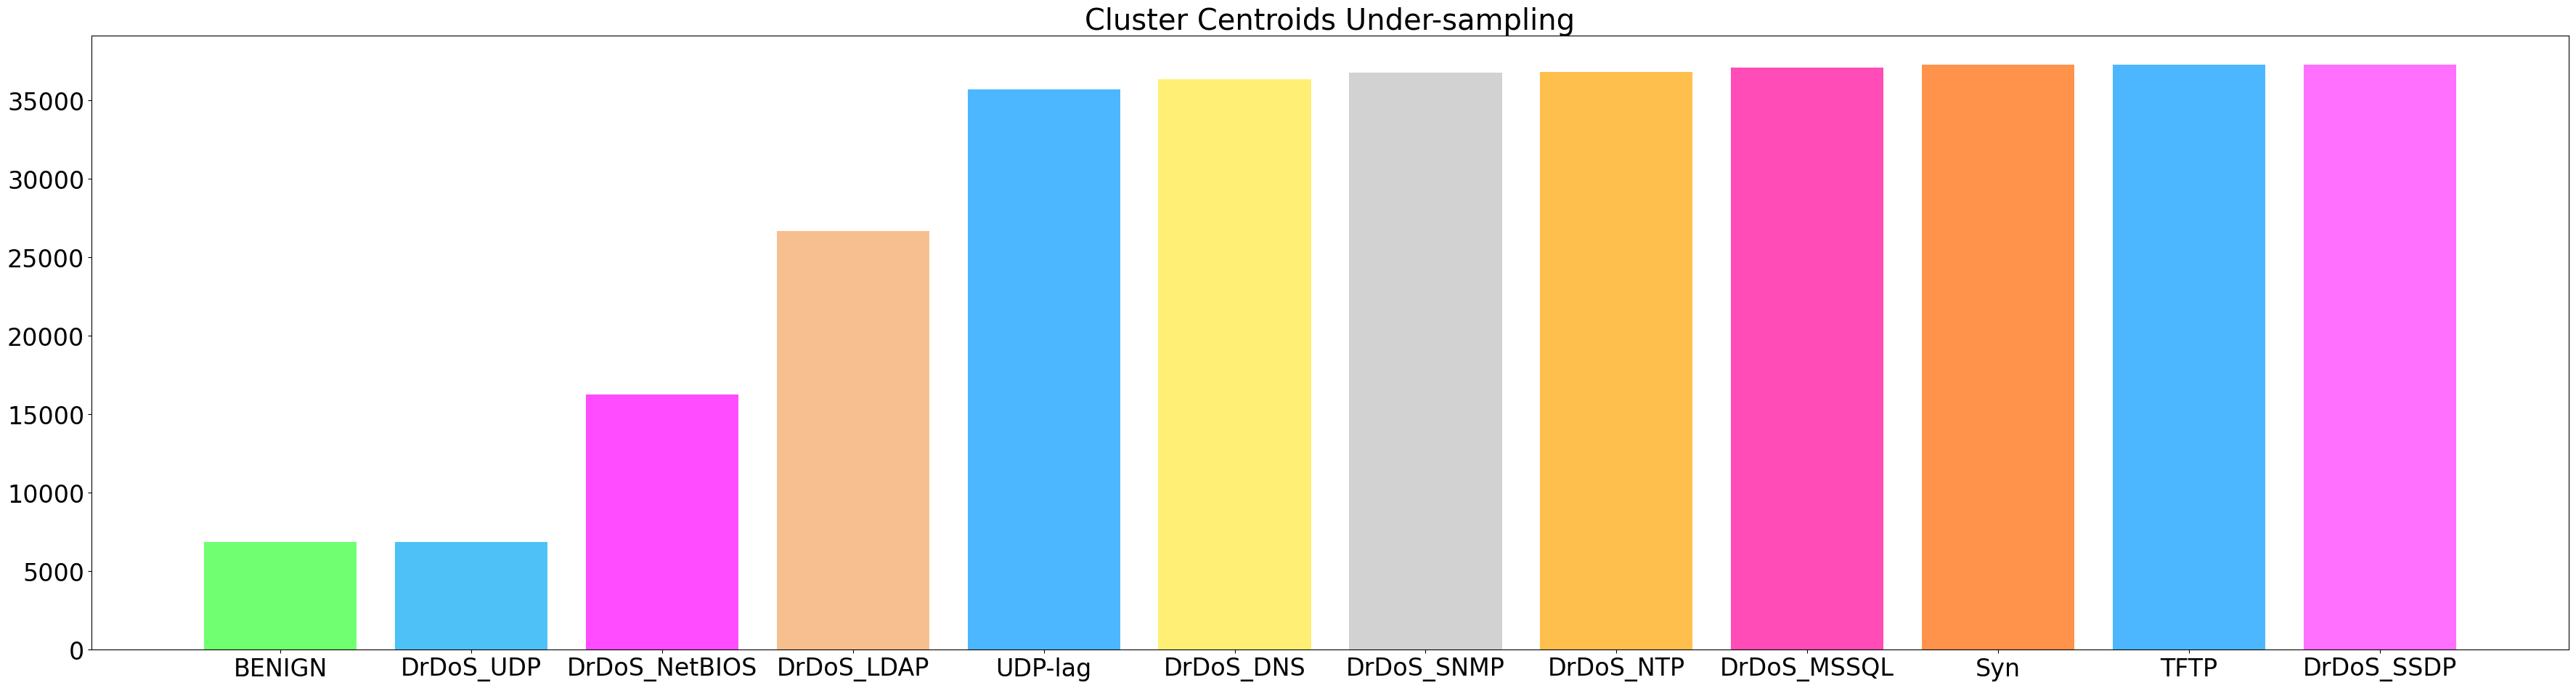

In [31]:
imgName = "Undersampled_by_Cluster_Centroids.png"
colors = ["#33FF33","#03A9F4","magenta","#F4A460","#0099FF","#FFEB3B","#C0C0C0","orange","#FF0099","#FF6600","#0099FF","#FF33FF"]

plt.figure(figsize=(36,10))
plt.bar(x=sorted(counter, key=counter.get),height=sorted(counter.values()),color=colors,alpha=0.7,align="center",linewidth=0.5)
plt.rcParams['font.size'] = 24
plt.title("Cluster Centroids Under-sampling")
plt.tight_layout()
plt.savefig(imgPath+imgName)

<center><h3 style="background:#FF6F00;color:black">
Applying SMOTE (Synthetic Minority Oversampling)
</h3></center>

In [34]:
from collections import Counter
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=3,random_state = 42,n_jobs=-1,sampling_strategy='auto')
X_resampled_sm, y_resampled_sm = sm.fit_resample(X, y)

data_res = np.concatenate((X_resampled_sm, np.vstack(y_resampled_sm)), axis = 1)
data_res = pd.DataFrame(data_res,columns=df.columns)
data_res = shuffle(data_res)
fileName = "SMOTE_Over-sampled_Dataset.csv"
data_res.to_csv(filePath+fileName,index=False,header=True)

counter = Counter(y_resampled_sm)
counter.most_common() # sorting ascending order for better plotting in graph
for i,j in counter.items():
    per = j/len(y_resampled_sm) * 100
    print(f"Label:{i}  n:{j}  {per:.3}%")

Label:DrDoS_UDP  n:37348  8.33%
Label:DrDoS_SSDP  n:37348  8.33%
Label:TFTP  n:37348  8.33%
Label:DrDoS_NTP  n:37348  8.33%
Label:UDP-lag  n:37348  8.33%
Label:DrDoS_SNMP  n:37348  8.33%
Label:DrDoS_DNS  n:37348  8.33%
Label:DrDoS_MSSQL  n:37348  8.33%
Label:Syn  n:37348  8.33%
Label:DrDoS_LDAP  n:37348  8.33%
Label:DrDoS_NetBIOS  n:37348  8.33%
Label:BENIGN  n:37348  8.33%


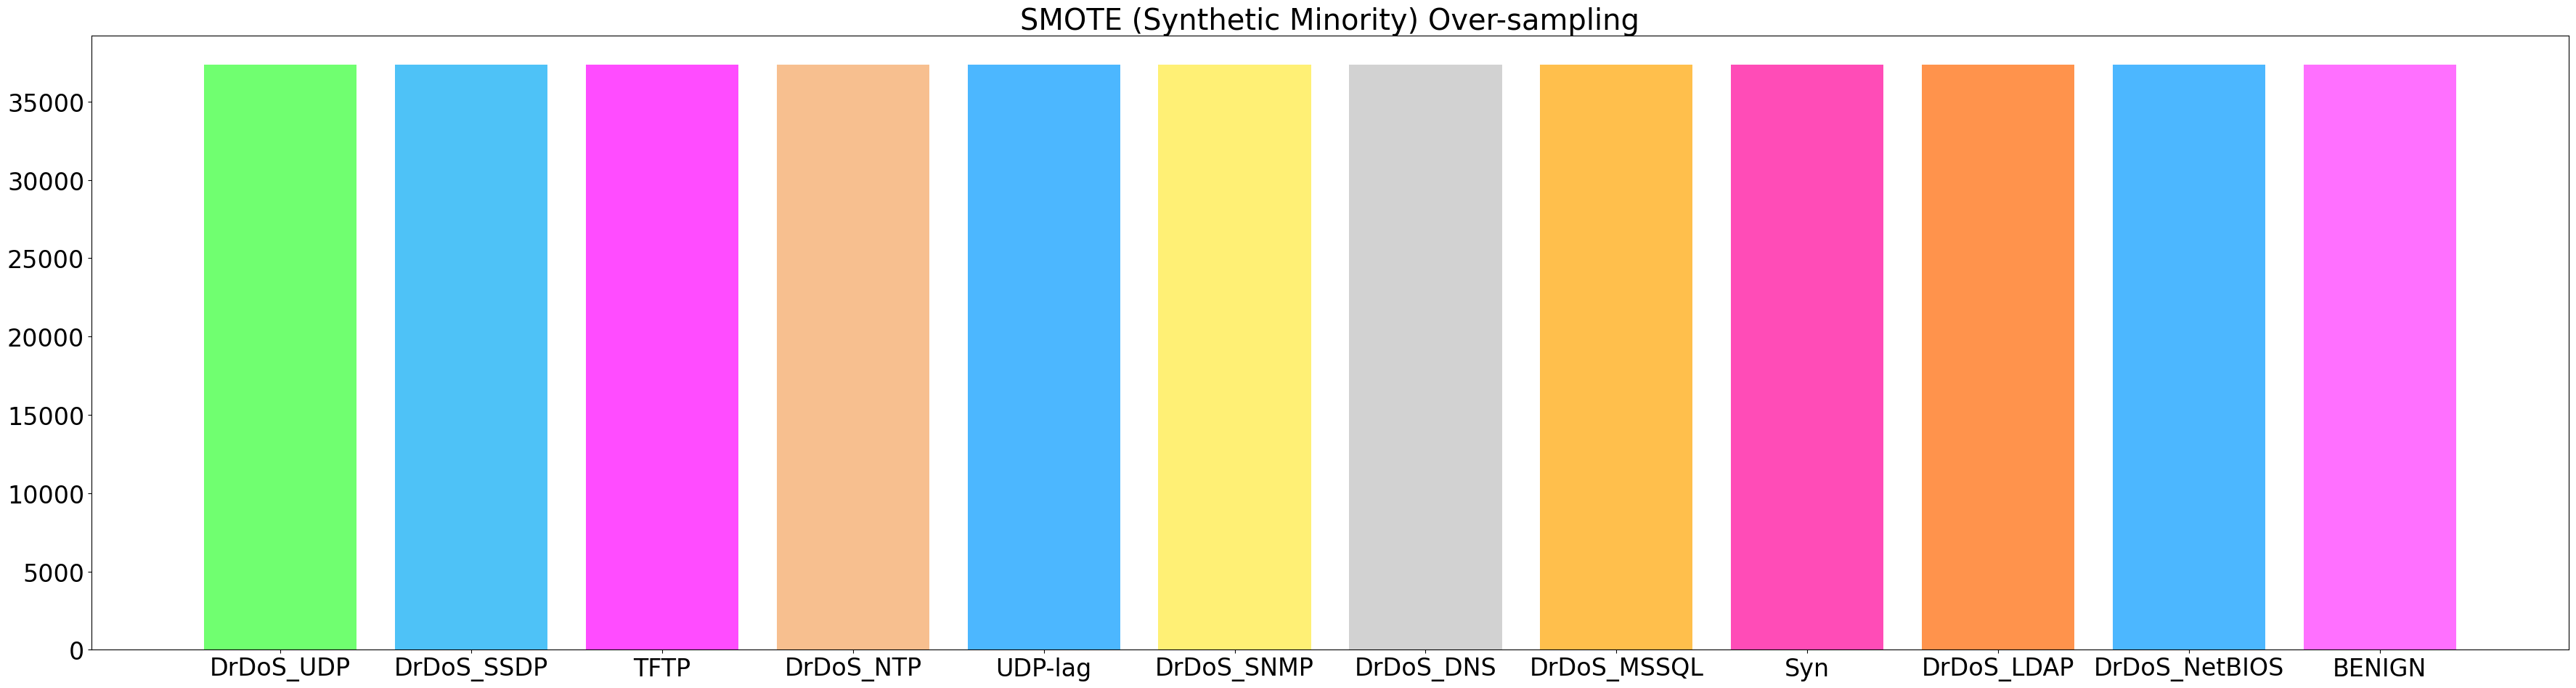

In [35]:
imgName = "Oversampled_by_SMOTE.png"
colors = ["#33FF33","#03A9F4","magenta","#F4A460","#0099FF","#FFEB3B","#C0C0C0","orange","#FF0099","#FF6600","#0099FF","#FF33FF"]

plt.figure(figsize=(36,10))
plt.bar(x=sorted(counter, key=counter.get),height=sorted(counter.values()),color=colors,alpha=0.7,align="center",linewidth=0.5)
plt.rcParams['font.size'] = 24
plt.title("SMOTE (Synthetic Minority) Over-sampling")
plt.tight_layout()
plt.savefig(imgPath+imgName)

<center><h3 style="background:#FF6F00;color:black">
Applying BorderLine SMOTE Oversampling
</h3></center>

In [36]:
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE

blsm = BorderlineSMOTE(random_state=42,k_neighbors=3,m_neighbors=10,sampling_strategy='auto',)
X_resampled_blsm, y_resampled_blsm = blsm.fit_resample(X, y)

data_res = np.concatenate((X_resampled_blsm, np.vstack(y_resampled_blsm)), axis = 1)
data_res = pd.DataFrame(data_res,columns=df.columns)
data_res = shuffle(data_res)
fileName = "BorderLine_SMOTE_Over-sampled_Dataset.csv"
data_res.to_csv(filePath+fileName,index=False,header=True)

counter = Counter(y_resampled_blsm)
counter.most_common() # sorting ascending order for better plotting in graph
for i,j in counter.items():
    per = j/len(y_resampled_blsm) * 100
    print(f"Label:{i}  n:{j}  {per:.3}%")

Label:DrDoS_UDP  n:37348  8.33%
Label:DrDoS_SSDP  n:37348  8.33%
Label:TFTP  n:37348  8.33%
Label:DrDoS_NTP  n:37348  8.33%
Label:UDP-lag  n:37348  8.33%
Label:DrDoS_SNMP  n:37348  8.33%
Label:DrDoS_DNS  n:37348  8.33%
Label:DrDoS_MSSQL  n:37348  8.33%
Label:Syn  n:37348  8.33%
Label:DrDoS_LDAP  n:37348  8.33%
Label:DrDoS_NetBIOS  n:37348  8.33%
Label:BENIGN  n:37348  8.33%


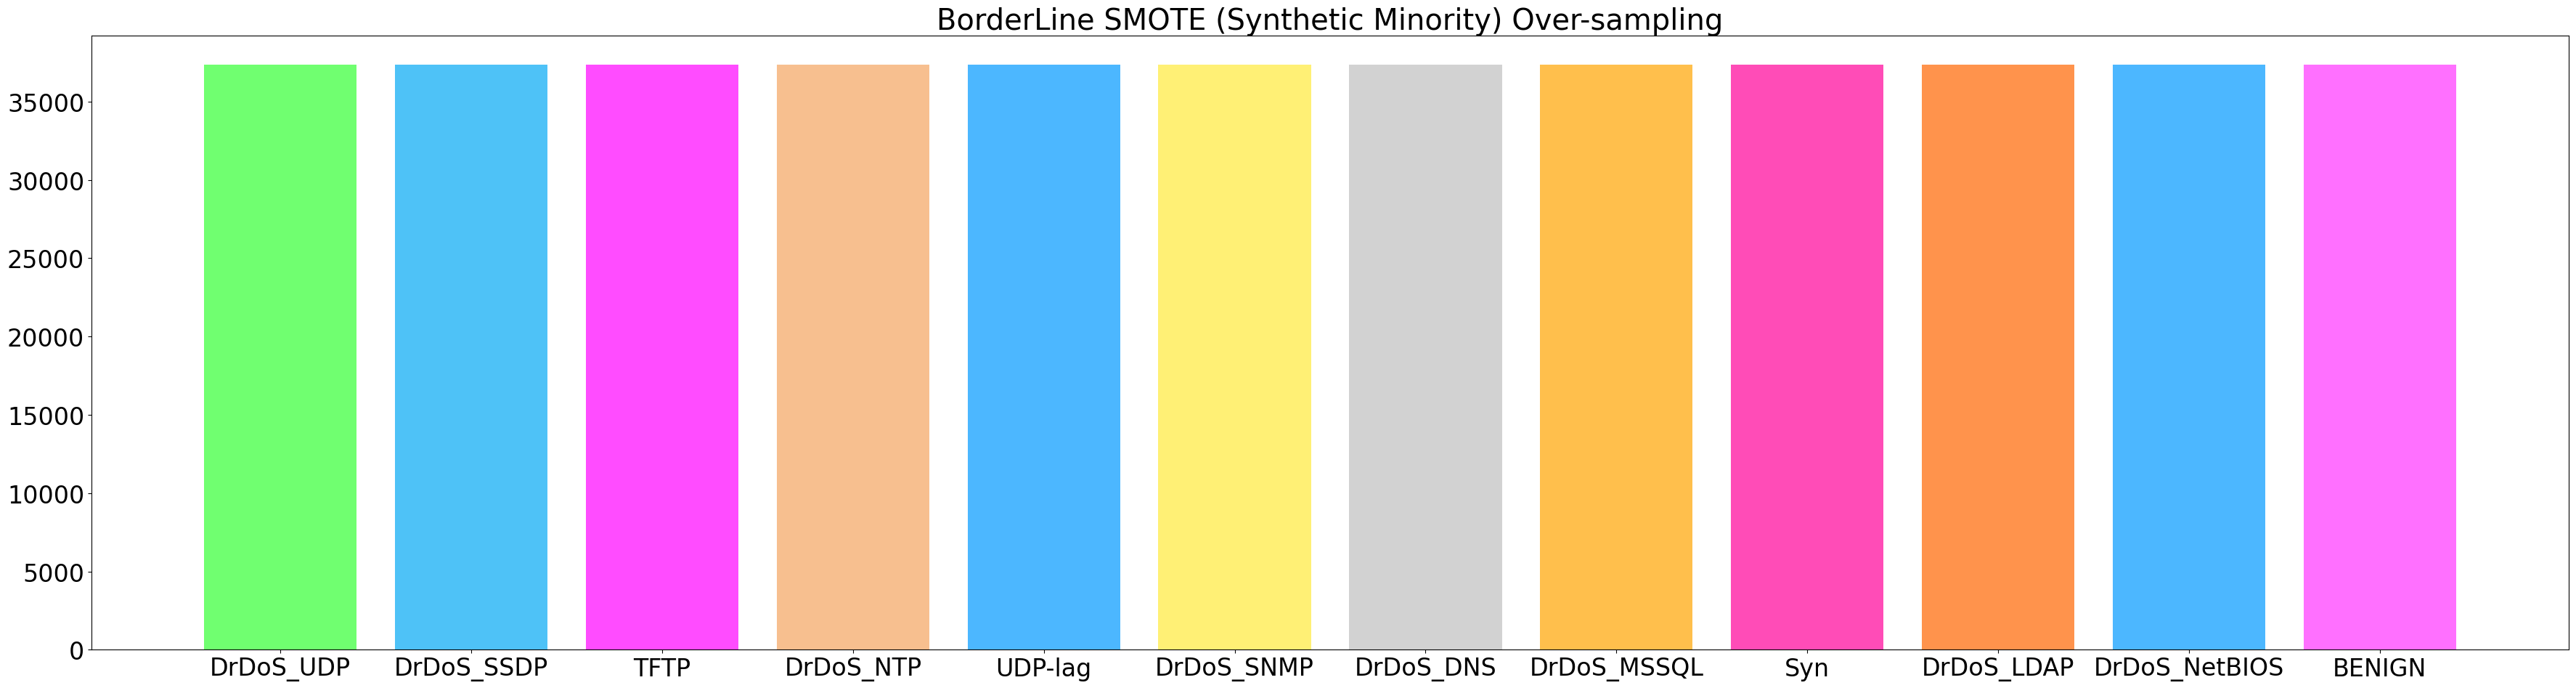

In [37]:
imgName = "Oversampled_by_BorderLine_SMOTE.png"
colors = ["#33FF33","#03A9F4","magenta","#F4A460","#0099FF","#FFEB3B","#C0C0C0","orange","#FF0099","#FF6600","#0099FF","#FF33FF"]

plt.figure(figsize=(36,10))
plt.bar(x=sorted(counter, key=counter.get),height=sorted(counter.values()),color=colors,alpha=0.7,align="center",linewidth=0.5)
plt.rcParams['font.size'] = 24
plt.title("BorderLine SMOTE (Synthetic Minority) Over-sampling")
plt.tight_layout()
plt.savefig(imgPath+imgName)